In [17]:
from vqf.preprocessing import create_clauses
from itertools import product
import pandas as pd
from IPython.display import display
from sympy import simplify
import numpy as np
import sys

sys.path.append(f"./../")
from src.clause_utils import table_form
from src import Clause, SetsGraph

In [18]:
# p = 5
# q = 3

# p = 7
# q = 3

# p = 11
# q = 7

# p = 241
# q = 233

p = 13
q = 11

# p = 557
# q = 523

m = p * q

p_bits, q_bits, z_bits, clauses = create_clauses(
    m, apply_preprocessing=False, verbose=False
)

for c in clauses:
    display(c)

p_0*q_0 - 1

p_0*q_1 + p_1*q_0 - 2*z_1_2 - 4*z_1_3 - 8*z_1_4 - 16*z_1_5 - 32*z_1_6 - 64*z_1_7 - 1

p_0*q_2 + p_1*q_1 + p_2*q_0 + z_1_2 - 2*z_2_3 - 4*z_2_4 - 8*z_2_5 - 16*z_2_6 - 32*z_2_7 - 1

p_0*q_3 + p_1*q_2 + p_2*q_1 + p_3*q_0 + z_1_3 + z_2_3 - 2*z_3_4 - 4*z_3_5 - 8*z_3_6 - 16*z_3_7 - 1

p_1*q_3 + p_2*q_2 + p_3*q_1 + p_4*q_0 + z_1_4 + z_2_4 + z_3_4 - 2*z_4_5 - 4*z_4_6 - 8*z_4_7

p_2*q_3 + p_3*q_2 + p_4*q_1 + p_5*q_0 + z_1_5 + z_2_5 + z_3_5 + z_4_5 - 2*z_5_6 - 4*z_5_7

p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6*q_0 + z_1_6 + z_2_6 + z_3_6 + z_4_6 + z_5_6 - 2*z_6_7

p_4*q_3 + p_5*q_2 + p_6*q_1 + p_7*q_0 + z_1_7 + z_2_7 + z_3_7 + z_4_7 + z_5_7 + z_6_7 - 1

p_5*q_3 + p_6*q_2 + p_7*q_1

p_6*q_3 + p_7*q_2

p_7*q_3

In [19]:
p_bits_simple, q_bits_simple, z_bits_simple, simplified_clauses = create_clauses(
    m, apply_preprocessing=True, verbose=False
)

for c in simplified_clauses:
    display(c)


0

0

0

p_3 - 2*q_1*q_2 + q_1 + q_2 + q_3 - 2*z_3_4 - 1

p_3*q_1 + p_4 - q_1*q_3 + q_3 + z_3_4 - 2*z_4_5 - 4*z_4_6

p_3*q_2 + p_4*q_1 + p_5 - q_2*q_3 + q_3 + z_4_5 - 2*z_5_6 - 4*z_5_7

p_3*q_3 + p_4*q_2 + p_5*q_1 + p_6 + z_4_6 + z_5_6 - 2*z_6_7

p_4*q_3 + p_5*q_2 + p_6*q_1 + p_7 + z_5_7 + z_6_7 - 1

p_5*q_3 + p_6*q_2 + p_7*q_1

p_6*q_3 + p_7*q_2

p_7*q_3

In [20]:
def get_space_eff_clauses(simplified_clauses):
    eff_clauses = {}
    for c in simplified_clauses:
        if c != 0:
            c = Clause(c)
            table = c.reduce_space().remove_carry_bits()
            bits = table.bits
            eff_clauses[table] = bits
    return eff_clauses

eff_clauses = get_space_eff_clauses(simplified_clauses)

for bits in (eff_clauses.values()):
    print(bits)

{p_3, q_1, q_2, q_3}
{p_3, p_4, q_1, q_3}
{p_3, q_1, q_2, p_4, p_5, q_3}
{p_3, q_1, q_2, p_4, p_5, p_6, q_3}
{q_1, p_7, q_2, p_4, p_5, p_6, q_3}
{q_1, p_7, q_2, p_5, p_6, q_3}
{p_6, p_7, q_2, q_3}
{p_7, q_3}


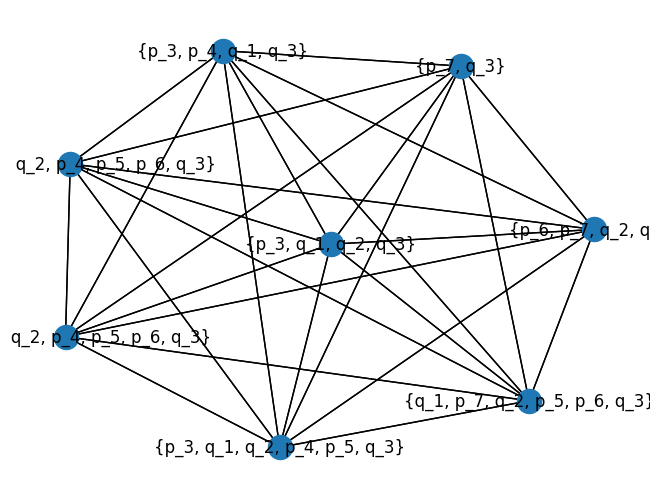

In [21]:
pq_bits = eff_clauses.values()
graph = SetsGraph(pq_bits)
disjoint_sets = graph.disjoint_sets
graph.draw()

In [22]:
def get_best_bits_table(simplified_clauses):
    min_r = float('inf')  # Initialize min_r to infinity
    best_table = None  # Initialize min_c to None

    for c in simplified_clauses:
        if c != 0:
            c = Clause(c)
            table = c.reduce_space().remove_carry_bits()
            r = table.calc_r()

            if r < min_r:
                min_r = r
                best_table = table.table

    return best_table

# Usage
best_clause = get_best_bits_table(simplified_clauses)
display(best_clause)

,q_1,p_7,q_2,p_5,p_6,q_3
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
5,0,0,0,1,1,0
6,0,0,1,0,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,0,1,0,0,0,0


In [23]:
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None  # Value not found

In [24]:
def get_superposition_tables(simplified_clauses, disjoint_sets):
    superposition_tables = []
    if len(disjoint_sets) == 0:
        best_clause = get_best_bits_table(simplified_clauses)
        superposition_tables.append(best_clause)

    elif len(disjoint_sets) == 1:
        for s in disjoint_sets[0]:
            table = get_key_by_value(eff_clauses, s).table
            superposition_tables.append(table)
    
    else: raise NotImplementedError

    return superposition_tables

superposition_tables = get_superposition_tables(simplified_clauses, disjoint_sets)

for table in superposition_tables:
    display(table)

,q_1,p_7,q_2,p_5,p_6,q_3
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
5,0,0,0,1,1,0
6,0,0,1,0,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,0,1,0,0,0,0
